# Employee Promotion Prediction using Classification Model (Biner)

## Description
This report provides employee promotion prediction using classification algoritms. The dataset used in this report for modeling is real employee data in a company. This file can access in Google Drive

The report is structured as follows:
1. Data Extraction
2. Exploratory Data Analysis
3. Data Preparation
4. Modeling
5. Evaluation
6. Recommendation

## Data Extraction

Import Necessary Libraries 

In [1]:
import pandas as pd #untuk mengolah dataset
import numpy as np #untuk menghitung algoritma

#Untuk plotting dan visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#Disable Warning
import warnings
warnings.filterwarnings("ignore")

Read Data

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Digital Skola/Final Project/Dataset15_Employee_Promotion.csv")
df.head(5)

,employee_id,department,education,gender,recruitment_channel,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,0
1,65141,Operations,Bachelor's,m,other,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,0
3,2542,Sales & Marketing,Bachelor's,m,other,0
4,48945,Technology,Bachelor's,m,other,0


Check Data

In [4]:
#Cek tipe data
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          54808 non-null  int64 
 1   department           54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   is_promoted          54808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


#Exploratory Data Analysis

Check Missing Value

In [5]:
#Cek missing value "Education" karena non null nya beda, berarti ada nilai Nan
df.isna().sum()

employee_id               0
department                0
education              2409
gender                    0
recruitment_channel       0
is_promoted               0
dtype: int64

In [6]:
2409/54808*100 #Missing value (%)

4.395343745438622

Check Duplicate Data

In [7]:
df = df.drop_duplicates() #Semua data bernilai unik karena memiliki id berbeda

Check Distribusi Data





In [8]:
#Cek ditribusi semua data
df.describe()

,employee_id,is_promoted
count,54808.000000,54808.000000
mean,39195.830627,0.085170
std,22586.581449,0.279137
min,1.000000,0.000000
25%,19669.750000,0.000000
50%,39225.500000,0.000000
75%,58730.500000,0.000000
max,78298.000000,1.000000


Check Imbalance Data

In [9]:
#Cek distribusi variabel dependen(target)
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64


Apa Yang Harus Kita Lakukan?

Kesimpulan : Ada data value "education" yang bernilai Nan sebanyak 2409 baris (4,4 %) dari keseluruhan data yang ada.
Maka kita harus:
1. Hapus kolom employee_id terlebih dahulu karena diskrit
2. Mengisi nan pada education dengan dengan 'modus'
3. Encoding Nominal Data using One-Hot Enconding
4. Encoding Ordinal Data using Mean Ordinal Encoding
5. Samakan tipe data
6. Handling Imbalance Data -> Melakukan Teknik SMOTE dengan Sampling

##Unvariate Analysis

##Cek Masing - Masing tipe variabel

Employee ID

In [10]:
#employee_id -> data employee_id bisa dihapus kolomnya karena bernilai diskrit(unique)
df['employee_id'].duplicated().any()

False

Department

In [11]:
#department -> tipe data kategorikal nominal
df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

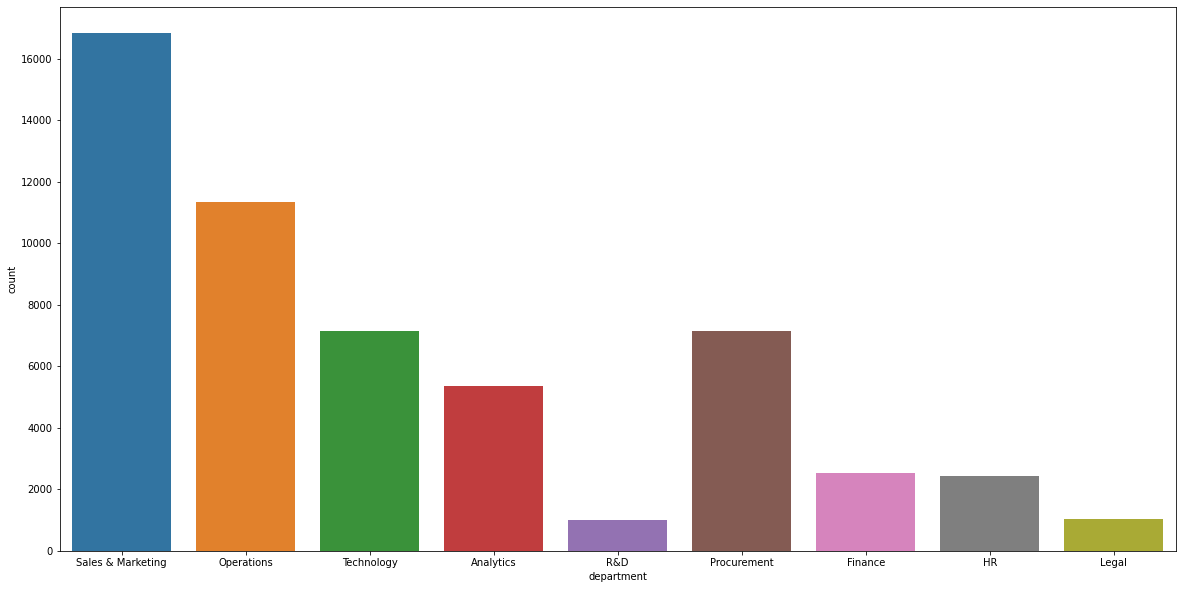

In [12]:
#visualisasi data value "department"
#sns.histplot(x= 'department',data=df)
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='department')

Based on the bar plot above, we can see that the Sales & Marketing department is the department with the most employees.

Berdasarkan diagram batang di atas, kita dapat melihat bahwa departemen Sales & Marketing adalah departemen dengan jumlah karyawan paling banyak.

In [13]:
#Cek jumlah tiap value "department"
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [14]:
#Rasio Tiap value Department Terhadap Target
per_is_promoted = df.groupby(['department', 'is_promoted']).size().to_frame('Total')
per_department = df.groupby(['department']).size().to_frame('Aggregate')
per_is_prom_dept = per_is_promoted.join(
    per_department,
    on='department'
    )
per_is_prom_dept['Ratio'] = per_is_prom_dept['Total'] / per_is_prom_dept['Aggregate'] * 100
per_is_prom_dept = per_is_prom_dept.reset_index()

In [15]:
per_is_prom_dept

,department,is_promoted,Total,Aggregate,Ratio
0,Analytics,0,4840,5352,90.433483
1,Analytics,1,512,5352,9.566517
2,Finance,0,2330,2536,91.876972
3,Finance,1,206,2536,8.123028
4,HR,0,2282,2418,94.375517
5,HR,1,136,2418,5.624483
6,Legal,0,986,1039,94.898941
7,Legal,1,53,1039,5.101059
8,Operations,0,10325,11348,90.985196
9,Operations,1,1023,11348,9.014804


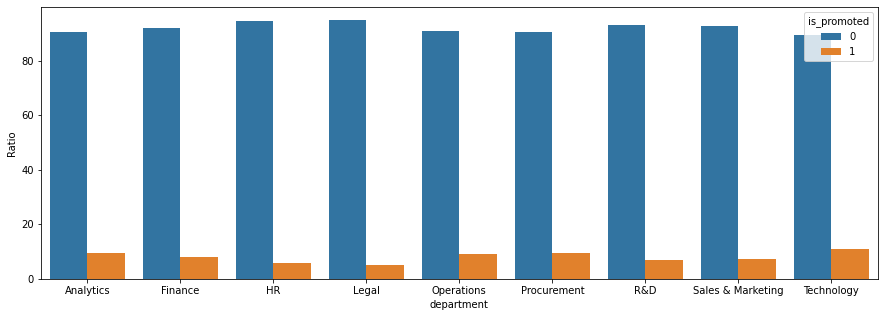

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=per_is_prom_dept, y='Ratio', x='department', hue='is_promoted')

Education

In [17]:
#Education -> tipe data kategorikal ordinal
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

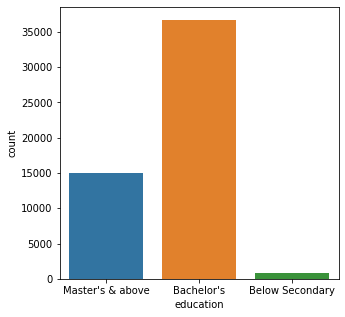

In [18]:
#visualisasi data value "education"
#sns.histplot(df, x = 'education')
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='education')

Based on the bar plot above, we can see that the most employees are Bachelor's education.

Berdasarkan diagram batang di atas, kita dapat melihat bahwa Sarjana adalah tingkat pendidikan karyawan paling banyak.

In [19]:
#Cek jumlah tiap value "education"
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [20]:
#Rasio Tiap value Education Terhadap Target
per_is_promoted = df.groupby(['education', 'is_promoted']).size().to_frame('Total')
per_education = df.groupby(['education']).size().to_frame('Aggregate')
per_is_prom_educ = per_is_promoted.join(
    per_education,
    on='education'
    )
per_is_prom_educ['Ratio'] = per_is_prom_educ['Total'] / per_is_prom_educ['Aggregate'] * 100
per_is_prom_educ = per_is_prom_educ.reset_index()

In [21]:
per_is_prom_educ

,education,is_promoted,Total,Aggregate,Ratio
0,Bachelor's,0,33661,36669,91.796886
1,Bachelor's,1,3008,36669,8.203114
2,Below Secondary,0,738,805,91.677019
3,Below Secondary,1,67,805,8.322981
4,Master's & above,0,13454,14925,90.144054
5,Master's & above,1,1471,14925,9.855946


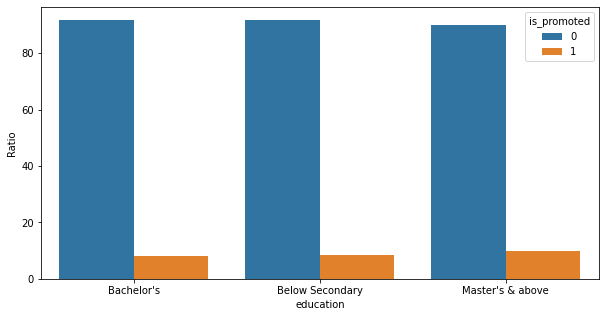

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=per_is_prom_educ, y='Ratio', x='education', hue='is_promoted')

Gender

In [23]:
#Gender -> Tipe data kategorikal nominal
df['gender'].unique()

array(['f', 'm'], dtype=object)

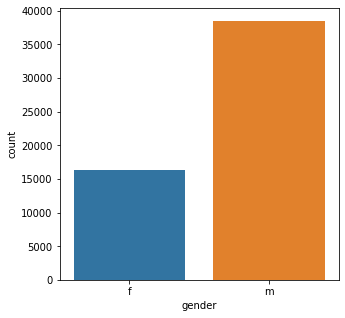

In [24]:
#visualisasi data value "gender"
#sns.histplot(df, x = 'gender')
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='gender')

Based on the bar plot above, we can see that the most employees are Male.

Berdasarkan diagram batang di atas, kita dapat melihat bahwa Male adalah Gender dengan jumlah karyawan paling banyak.

In [25]:
#Cek jumlah tiap value "gender"
df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [26]:
per_is_promoted = df.groupby(['gender', 'is_promoted']).size().to_frame('Total')
per_gender = df.groupby(['gender']).size().to_frame('Aggregate')
per_is_prom_gender = per_is_promoted.join(
    per_gender,
    on='gender'
    )
per_is_prom_gender['Ratio'] = per_is_prom_gender['Total'] / per_is_prom_gender['Aggregate'] * 100
per_is_prom_gender = per_is_prom_gender.reset_index()

In [27]:
per_is_prom_gender

,gender,is_promoted,Total,Aggregate,Ratio
0,f,0,14845,16312,91.006621
1,f,1,1467,16312,8.993379
2,m,0,35295,38496,91.684850
3,m,1,3201,38496,8.315150


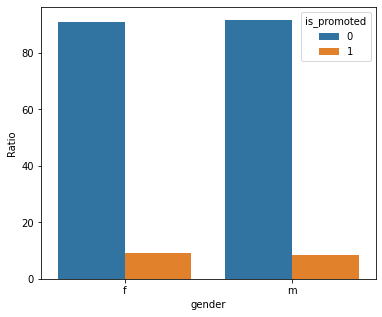

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(data=per_is_prom_gender, y='Ratio', x='gender', hue='is_promoted')

recruitment_channel

In [29]:
df['recruitment_channel'].unique()
#recruitment_channel -> tipe data kategorikal nominal

array(['sourcing', 'other', 'referred'], dtype=object)

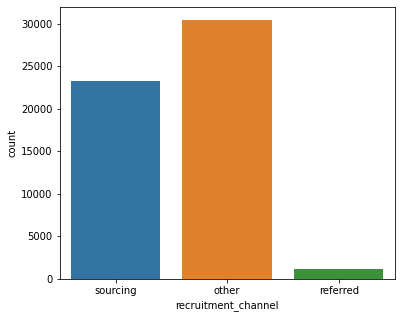

In [30]:
#visualisasi data value "recruitment_channel"
#sns.histplot(df,x = "recruitment_channel")
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='recruitment_channel')

Based on the bar plot above, we can see that the most employees are Other.

Berdasarkan diagram batang di atas, kita dapat melihat bahwa Lainnya adalah jalur rekrutmen dengan jumlah karyawan paling banyak.

In [31]:
per_is_promoted = df.groupby(['recruitment_channel', 'is_promoted']).size().to_frame('Total')
per_recruitment_channel = df.groupby(['recruitment_channel']).size().to_frame('Aggregate')
per_is_prom_recr = per_is_promoted.join(
    per_recruitment_channel,
    on='recruitment_channel'
    )
per_is_prom_recr['Ratio'] = per_is_prom_recr['Total'] / per_is_prom_recr['Aggregate'] * 100
per_is_prom_recr = per_is_prom_recr.reset_index()

In [32]:
per_is_prom_recr

,recruitment_channel,is_promoted,Total,Aggregate,Ratio
0,other,0,27890,30446,91.604809
1,other,1,2556,30446,8.395191
2,referred,0,1004,1142,87.915937
3,referred,1,138,1142,12.084063
4,sourcing,0,21246,23220,91.498708
5,sourcing,1,1974,23220,8.501292


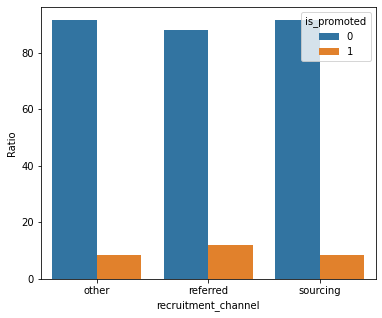

In [33]:
plt.figure(figsize=(6,5))
sns.barplot(data=per_is_prom_recr, y='Ratio', x='recruitment_channel', hue='is_promoted')

In [34]:
#Cek jumlah tiap value "recruitment_channel"
df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

Is_promoted

In [35]:
df['is_promoted'].unique()
#is_promoted adalah variabel dependen(target)

array([0, 1])

In [36]:
# is promoted -> target class  (output)
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          54808 non-null  int64 
 1   department           54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   is_promoted          54808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


##Cek Distribusi Data

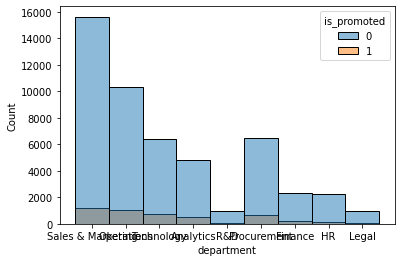

In [38]:
sns.histplot(df, x= 'department', hue='is_promoted') 
#x adalah sumbu x -> garis horizontal
#hue adalah sumbu z -> memperdetail visualisasi dari kolom lainnya

Merge untuk Melihat Rasio


In [39]:
#Gunakan merge untuk lihat rasio masing value "department"

per_is_promoted = df.groupby(['department', 'is_promoted']).size().to_frame('total').reset_index()
per_deparment = df.groupby(['department']).size().to_frame('total_all').reset_index()

merged = per_is_promoted.merge(
per_deparment,
on='department')

merged['ratio'] = merged['total_all'] / merged['total']
merged

,department,is_promoted,total,total_all,ratio
0,Analytics,0,4840,5352,1.105785
1,Analytics,1,512,5352,10.453125
2,Finance,0,2330,2536,1.088412
3,Finance,1,206,2536,12.310680
4,HR,0,2282,2418,1.059597
5,HR,1,136,2418,17.779412
6,Legal,0,986,1039,1.053753
7,Legal,1,53,1039,19.603774
8,Operations,0,10325,11348,1.099080
9,Operations,1,1023,11348,11.092864


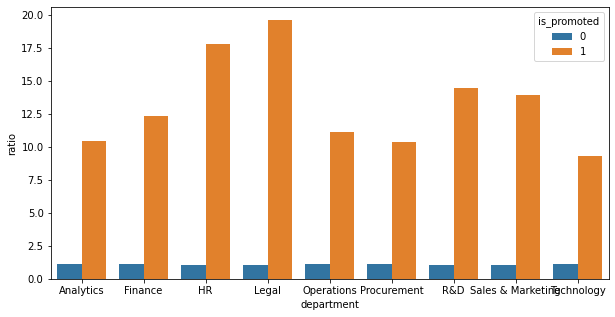

In [40]:
#Visualisasi Data Rasio antara department dan is_promoted
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=merged, y ='ratio' , hue = 'is_promoted', x = 'department')

#Data Preparation

##Data Cleansing

###Feature Engineering

Fungsi :
1.   ***Menambah atau membuang feature***, pilih feature yang signifikan mempengaruhi nilai akhir.
2.   ***One-hot encoding***, cara mempresentasikan data tipe kategori sebagai numeric dimana dapat dipahami model machine learning.
3.  ***Menggabungkan beberapa fitur menjadi 1 fitur***, agar model lebih  simple. Contoh, ukuran panjang dan lebar tanah, maka cukup digabungkan menjadi 1 fitur saja, yaitu luas tanah yang merupakan perhitungan dari panjang x lebar yang digunakan.
4. **Binning**, mengganti angka numerical menjadi kategori yang lebih luas, agar model lebih simple. Contoh, data ukuran kolam renang, diubah menjadi boolean, True jika ada kolam renang, dan False jika tidak ada.

Drop/Menghapus Variabel yang Distrik

In [41]:
#Membuang fitur employee_id karena bernilai numerikal district(unique)
df = df.drop(['employee_id'], 1)

Cek Missing Value

In [42]:
#Melihat data value education yang NaN
df[df['education'].isna()]

,department,education,gender,recruitment_channel,is_promoted
10,Technology,NaN,m,sourcing,0
21,Operations,NaN,m,sourcing,0
32,Sales & Marketing,NaN,f,sourcing,0
43,Sales & Marketing,NaN,m,other,0
82,Sales & Marketing,NaN,m,sourcing,0
...,...,...,...,...,...
54692,Sales & Marketing,NaN,f,sourcing,0
54717,Analytics,NaN,m,sourcing,0
54729,HR,NaN,f,other,0
54742,Sales & Marketing,NaN,m,other,0


In [43]:
#persentase missing value "education"
2409/54806 *100
#tidak perlu kita hapus karena terlalu berpengaruh sekitar 4,4 %
#Karena value "education" bertipe kategorik, maka kita akan mengisi value Nan dengan modus (value yang paling banyak)

4.395504141882276

In [44]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Handle missing value
Fungsi :
Mengisi variabel Nan pada kolom yang kosong pada variabel Education dengan menggunakan modus

In [45]:
#Handling missing value "Education" with mode 
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['education']
#Menghapus kolom yang mempunyai missing value pada "education"
#df[~df['education'].isna()]

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806          Bachelor's
54807          Bachelor's
Name: education, Length: 54808, dtype: object

In [46]:
#Memastikan informasi/kesamaan jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   education            54808 non-null  object
 2   gender               54808 non-null  object
 3   recruitment_channel  54808 non-null  object
 4   is_promoted          54808 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.5+ MB


Sampai tahap ini Data kita sudah bersih dan data siap untuk dilakukan preprocessing karena jumlah data telah sama.

##Correlation Analysis

Untuk mengetahui apakah diantara dua variabel terdapat hubungan atau tidak, dan jika ada hubungan bagaimanakah arah hubungan dan seberapa besar hubungan tersebut. Yang dimaksud adalah hubungan variabel X dan Y.

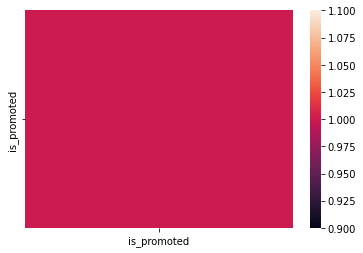

In [47]:
#karena data Imbalance, maka cek kolerasi matriks nya, jika ada yang korelasi nya diatas batas, maka bisa hapus salah satu kolom
#correlation matrix 
# koefisien korelasi berada di Intervalnya [-1,1]
FEATURE = ['department', 'education', 'recruitment_channel', 'gender']
TARGET =  'is_promoted'
sns.heatmap(df[FEATURE+[TARGET]].corr()) #membuat hubungan antara fitur dan target

##Split Data Train and Testing

Sekarang, kita harus membuat data split untuk data test dan data train. Di sini, kita alan menggunakan rasio 80:20 untuk data test dan data train. Dengan kata lain, kita harus menggunakan kerangka data baru.
Metode train/test split ini akan memberikan hasil prediksi yang lebih akurat untuk new data atau data yang baru.

Python memiliki library yang dapat mengimplementasikan train/test split dengan mudah yaitu Scikit-Learn. Untuk menggunakannya, kita perlu mengimport Scikit-Learn terlebih dahulu, kemudian setelah itu kita dapat menggunakan fungsi train_test_split().

In [48]:
from sklearn.model_selection import train_test_split

Setelah itu kita definisikan data yang menjadi source-nya (X)  dan juga data targetnya (y). Misalnya data source-nya adalah semua kolom kecuali kolom terakhir yang di ujung sebelah kanan dataset df, sedangkan data targetnya adalah kolom paling ujung kanan dengan nama kolom “is_promoted”, maka kita dapat mendefinisikannya seperti di bawah ini.

In [49]:
#Menentukan sumbu Fitur dan Target
FEATURE = ['department', 'education', 'recruitment_channel', 'gender']
TARGET =  'is_promoted'
X = df[FEATURE] #selain is_promoted
y = df[TARGET] #is_promoted

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train

,department,education,recruitment_channel,gender
14498,Procurement,Bachelor's,other,f
31236,Sales & Marketing,Bachelor's,sourcing,f
1312,Operations,Bachelor's,other,m
12,Sales & Marketing,Bachelor's,sourcing,m
42394,Sales & Marketing,Bachelor's,sourcing,m
...,...,...,...,...
8260,Sales & Marketing,Bachelor's,other,m
24687,Sales & Marketing,Bachelor's,sourcing,m
23322,HR,Bachelor's,other,m
14561,HR,Bachelor's,other,f


*   X_train: Untuk menampung data source yang akan dilatih.
*   X_test: Untuk menampung data target yang akan dilatih.
*   y_train: Untuk menampung data source yang akan digunakan untuk testing.
*   y_test: Untuk menampung data target yang akan digunakan untuk testing.

X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter test_size digunakan untuk mendefinisikan ukuran data testing. Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

Perlu diketahui bahwa metode ini akan membagi train set dan test set secara random atau acak. Jadi, jika kita mengulang proses running, maka tentunya hasil yang didapat akan berubah-ubah. Untuk mengatasinya, kita dapat menggunakan parameter random_state seperti contoh di bawah ini.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
#Angka yang didefinisikan pada parameter random_state boleh angka berapa saja yang berupa integer.

In [52]:
print("shap of X_train: ", X_train.shape)
print("shap of X_test: ", X_test.shape)
print("shap of y_train: \n", y_train.value_counts())
print("shap of y_test: \n", y_test.value_counts())

shap of X_train:  (43846, 4)
shap of X_test:  (10962, 4)
shap of y_train: 
 0    40094
1     3752
Name: is_promoted, dtype: int64
shap of y_test: 
 0    10046
1      916
Name: is_promoted, dtype: int64


In [53]:
X_train

,department,education,recruitment_channel,gender
5828,R&D,Bachelor's,sourcing,m
46029,Procurement,Bachelor's,sourcing,m
1210,HR,Master's & above,other,f
19469,Sales & Marketing,Bachelor's,other,m
26687,Operations,Below Secondary,sourcing,m
...,...,...,...,...
25544,Technology,Master's & above,sourcing,m
48056,Sales & Marketing,Bachelor's,other,m
11513,Analytics,Master's & above,sourcing,m
1688,Sales & Marketing,Bachelor's,other,m


In [54]:
X_test

,department,education,recruitment_channel,gender
38273,Analytics,Master's & above,sourcing,m
48472,Operations,Bachelor's,other,m
47398,Procurement,Master's & above,sourcing,f
24059,Technology,Bachelor's,other,f
52514,Operations,Bachelor's,sourcing,m
...,...,...,...,...
29752,Operations,Bachelor's,other,m
23254,Sales & Marketing,Bachelor's,other,f
51469,Analytics,Bachelor's,other,m
12976,Technology,Below Secondary,other,m


Jadi:

X_train -> data (80-an%) adalah 43.846 baris, 4 kolom.
 
X_test -> data (20-an%) adalah 10.962 baris, 4 kolom.

Terus kita mulai training x_train dan y_train. 

X_test nya di prediksi dan dimasukan ke variabel 'y_pred' yang bakal jadi array yang berisi hasil klasifikasi dari ke-10.962 data dari x_test.

### Transformasi Data (Mengubah Fitur Kategori ke dalam Numerik)

Model machine learning tidak dapat mengolah data kategorik(nominal), sehingga kita perlu melakukan konversi data kategorik menjadi data numerik.

Salah satu teknik untuk mengubah data kategorik menjadi data numerik adalah dengan menggunakan One Hot Encoding atau yang juga dikenal sebagai dummy variables. One Hot Encoding mengubah data kategorik dengan membuat kolom baru untuk setiap kategori.

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np
FEATURE_CAT_NUM = ['department', 'recruitment_channel', 'gender', 'education']
#FEATURE_CAT_OR = ['education']

#encoderL = LabelEncoder()
encoderOh = OneHotEncoder(sparse=False)

encoderOh.fit(X_train[FEATURE_CAT_NUM])
#encoderL.fit(X_train[FEATURE_CAT_OR])

OneHotEncoder(sparse=False)

In [56]:
#X_train_encL = encoderL.transform(X_train[FEATURE_CAT_OR])
X_train_encode = encoderOh.transform(X_train[FEATURE_CAT_NUM])

In [57]:
#X_test_encL = encoderL.transform(X_test[FEATURE_CAT_OR])
X_test_encode = encoderOh.transform(X_test[FEATURE_CAT_NUM])

In [58]:
#Memeriksa data X_train_encode
X_train_encode

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [59]:
X_test_encode

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [60]:
y_train

5828     0
46029    0
1210     0
19469    0
26687    0
        ..
25544    0
48056    0
11513    0
1688     0
5994     0
Name: is_promoted, Length: 43846, dtype: int64

In [61]:
y_test

38273    0
48472    0
47398    0
24059    1
52514    0
        ..
29752    0
23254    0
51469    0
12976    0
32040    1
Name: is_promoted, Length: 10962, dtype: int64

## Correlation Analysis

In [62]:
df

,department,education,gender,recruitment_channel,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,0
1,Operations,Bachelor's,m,other,0
2,Sales & Marketing,Bachelor's,m,sourcing,0
3,Sales & Marketing,Bachelor's,m,other,0
4,Technology,Bachelor's,m,other,0
...,...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing,0
54804,Operations,Master's & above,f,other,0
54805,Analytics,Bachelor's,m,other,0
54806,Sales & Marketing,Bachelor's,m,sourcing,0


In [63]:
encoded = pd.get_dummies(df)
encoded

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
54804,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
54805,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
54806,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1


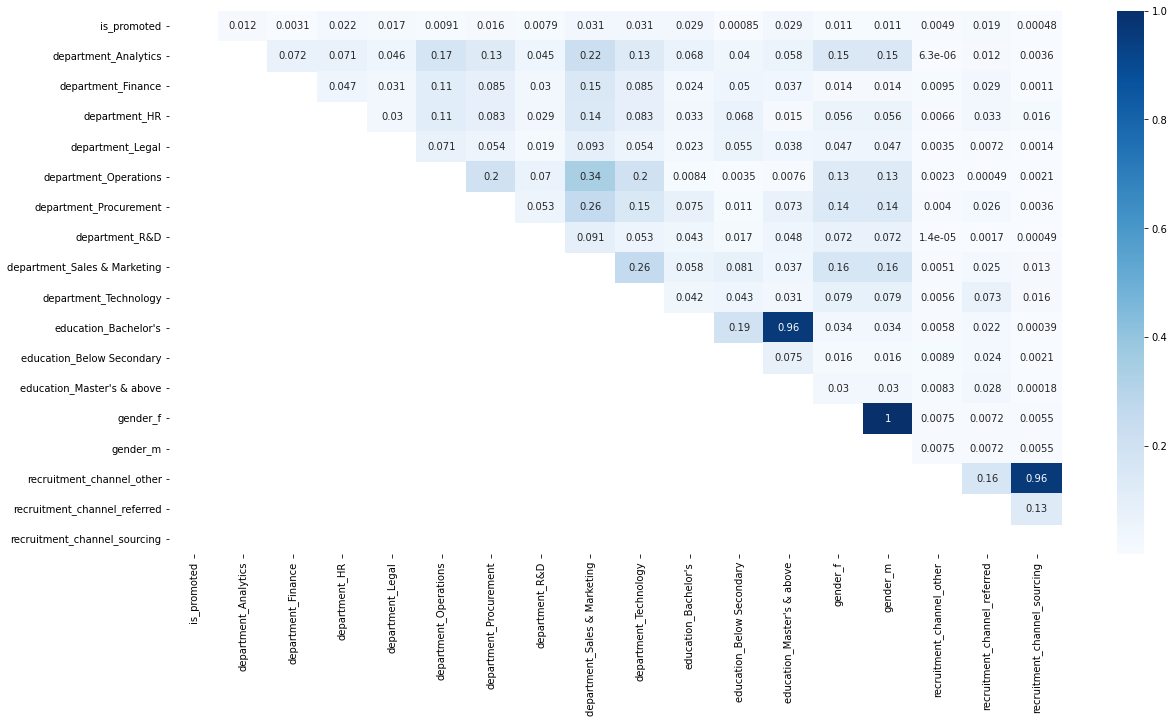

In [64]:
#Visualisasi Data Correlation Analysis
corr_matrix = encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,10))
sns.heatmap(upper, annot=True, cmap='Blues')

# Modelling Before Sampling

Selanjutnya, kita dapat menggunakannya untuk pemodelan dengan algoritma tertentu misalnya disini menggunakan beberapa model seperti contoh berikut:

In [65]:
#Machine Learning Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import class_weight

models = [
    #('DTC', DecisionTreeClassifier(class_weight='balanced')),
    #('LR', LogisticRegression(class_weight='balanced')),
    #('SVC', SVC(class_weight='balanced')),
    #('LinSVC', LinearSVC(class_weight='balanced')),
    ('KNC', KNeighborsClassifier(weights='uniform')),
    ('RFC', RandomForestClassifier(class_weight='balanced')),
    ('NB', GaussianNB())
    ]

In [66]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
for model_name, model in models:
    print('Training {}'.format(model_name))
    #Training the model
    model.fit(X_train_encode, y_train)

    #Memprediksi model dengan test set
    prediction = model.predict(X_test_encode)

    #Check performa model menggunakan Model 
    acc = accuracy_score(y_test, prediction)
    prec = precision_score(y_test, prediction)
    rec = recall_score(y_test, prediction)
    print("Model {}, Accuracy: {:.2F}, precision {:.2F}, recall {:.2F}".format(model_name, acc, prec, rec))

Training KNC
Model KNC, Accuracy: 0.92, precision 0.00, recall 0.00
Training RFC
Model RFC, Accuracy: 0.61, precision 0.10, recall 0.45
Training NB
Model NB, Accuracy: 0.90, precision 0.11, recall 0.03


In [70]:
#Check performa model menggunakan classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10046
           1       0.11      0.03      0.04       916

    accuracy                           0.90     10962
   macro avg       0.51      0.50      0.49     10962
weighted avg       0.85      0.90      0.87     10962



Dari classification report dapat dilihat bahwa model memiliki rata-rata performa sebelum di lakukan sampling sekitar 50% mulai dari precision, recall, f1-score Sedangkan Accuracy menunjukkan sekitar 90%. Ini terjadi karena akibat ketidakseimbangan data, kemudian accuracy membuat kesimpulan kedalam data yang mempunyai kecenderungan persentase paling besar.

Itulah sebabnya kita melakukan Sampling untuk melakukan pemodelan yang lebih baik dengan data yang seimbang.

# Evaluation

##Sampling

Sampling adalah proses di mana porsi dari suatu populasi diseleksi agar dapat mewakilkan populasi tersebut. Tujuan dari dilakukannya sampling adalah untuk mendapatkan sampel (objek sampling) yang benar-benar sesuai dan dapat menggambarkan populasi untuk dijadikan sebagai subjek penelitian.

Disini kami menggunakan 2 teknik sampling, yaitu Random Sampling dan SMOTE.
Random Sampling -> adalah mengambil secara acak dan menghasilkan sample baru untuk  *class* minoritas sehingga kedua *class* memilki jumlah sampel yang sama.

SMOTE -> adalah menghasilkan jumlah data sintetis, sesuai dengan jumlah data mayoritas.


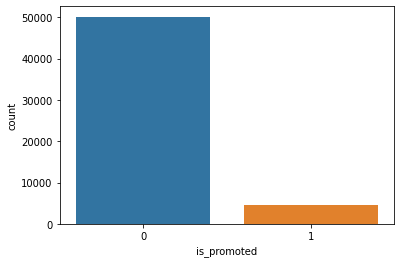

In [71]:
#check imbalance data
#check balance data
#print(df["is_promoted"].value_counts())

#df.groupby('is_promoted').size().plot(kind='pie',
                                       #y = "v1",
                                       #label = "Type",
                                       #autopct='%1.1f%%')
#Univariate analysis target.
sns.countplot(df['is_promoted'])

In [72]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [73]:
#Teknik Random Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over_sampler = RandomOverSampler(sampling_strategy={1:4500})
under_sampler = RandomUnderSampler(sampling_strategy={0:4500})
X_train_encode_smp, y_train_smp = over_sampler.fit_resample(X_train_encode,y_train)
X_train_encode_smp, y_train_smp = under_sampler.fit_resample(X_train_encode_smp, y_train_smp)

In [76]:
y_train_smp.value_counts()

0    4500
1    4500
Name: is_promoted, dtype: int64

#Modelling After Sampling

Selanjutnya, kita dapat menggunakannya untuk pemodelan data yang seimbang dengan menggunakan algoritma tertentu misalnya disini menggunakan beberapa model seperti contoh berikut:

In [74]:
models = [
    #('DTC', DecisionTreeClassifier(class_weight='balanced')),
    #('LR', LogisticRegression(class_weight='balanced')),
    #('SVC', SVC(class_weight='balanced')),
    #('LinSVC', LinearSVC(class_weight='balanced')),
    ('KNC', KNeighborsClassifier(weights='uniform')),
    ('RFC', RandomForestClassifier(class_weight='balanced')),
    ('NB', GaussianNB())
    ]

for model_name, model in models:
    print('Training {}'.format(model_name))

    model.fit(X_train_encode_smp, y_train_smp)
    predicted = model.predict(X_test_encode)

    acc = accuracy_score(y_test, predicted)
    prec = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)

    print('Model: {}, Acc: {:.2F}, Prec: {:.2F}, Recall: {:.2F}'.format(
        model_name, acc, prec, recall
    ))

Training KNC
Model: KNC, Acc: 0.46, Prec: 0.09, Recall: 0.56
Training RFC
Model: RFC, Acc: 0.51, Prec: 0.09, Recall: 0.57
Training NB
Model: NB, Acc: 0.39, Prec: 0.09, Recall: 0.72


In [79]:
#Check performa dari model menggunakan auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predicted)

0.539383138871236

In [80]:
#Check performa model menggunakan classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.35      0.51     10046
           1       0.09      0.72      0.16       916

    accuracy                           0.39     10962
   macro avg       0.51      0.54      0.34     10962
weighted avg       0.86      0.39      0.49     10962



*   Dari classification report dapat dilihat bahwa model memiliki rata-rata performa sekitar 50% mulai dari precision, recall, dan f1-score. Accuracy menunjukan akurasi sekitar 39%.

*   Lalu untuk score dari AUC dapat dilihat bahwa nilainya seitar 53,92%
Hasil dari 3 model yaitu algoritma KNeighbor Classifier, Random Forest Classifier, dan Naive Bayes yang memiliki performa paling baik adalah Naive Bayes recall sekitar 72%.



##Hyperparameter Search

Salah satu cara untuk menentukan kombinasi Hyperparameters adalah menggunakan Grid Search. Metriks pengukuran performa dari Grid Search adalah Mean Cross Validation (CV). Cara kerja dari Grid Search itu mengkombinasikan nilai yang kita masukan pada Hyperparameters. Contohnya adalah ketika kita ingin mencari kombinasi dari Hyperparameters C = [1] dan kernel=['linear], dan gamma=['scale'], maka Grid Search akan mencari seluruh kombinasi dari C, kernel, dan gamma tersebut dan memilih kombinasi terbaik berdasarkan nilai dari CV Score yang paling tinggi.

In [81]:
#Grid Search --> untuk mencari hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

#Cross Validation --> untuk mengatasi data-data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

%matplotlib inline

In [82]:
from sklearn.model_selection import GridSearchCV

#Menjadikan ke dalam bentuk dictionary
'''
param = {
    'C': [1, 0.01, 0.05, 0.001],
    'intercept_scaling' : [1, 0.01, 0.05, 0.001],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'dual' : [False],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:4}]
}

cv = GridSearchCV(LogisticRegression(), param, verbose=1, scoring='recall')
cv.fit(X_train_encode_smp, y_train_smp)
'''

"\nparam = {\n    'C': [1, 0.01, 0.05, 0.001],\n    'intercept_scaling' : [1, 0.01, 0.05, 0.001],\n    'penalty' : ['l1', 'l2', 'elasticnet'],\n    'dual' : [False],\n    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\n    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:4}]\n}\n\ncv = GridSearchCV(LogisticRegression(), param, verbose=1, scoring='recall')\ncv.fit(X_train_encode_smp, y_train_smp)\n"

In [84]:
#cv.best_params_

In [83]:
# Model LogisticRegression
#prediction1 = cv.predict(X_test_encode)

#acc = accuracy_score(y_test, prediction1)
#prec = precision_score(y_test, prediction1)
#rec = recall_score(y_test, prediction1)

#print("Accuracy: {:.2F}, precision {:.2F}, recall {:.2F}".format(acc, prec, rec))

In [85]:
# Model KNC
param = {
      'n_neighbors' : [5],
      'weights' : ['uniform'],
      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size' : [30],
      'p' : [1, 2],
      'metric' : ['minkowski'],
      'metric_params' : [None],
      'n_jobs' : [None]
      }

cv = GridSearchCV(KNeighborsClassifier(), param, verbose=1, scoring='precision')
cv.fit(X_train_encode, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30], 'metric': ['minkowski'],
                         'metric_params': [None], 'n_jobs': [None],
                         'n_neighbors': [5], 'p': [1, 2],
                         'weights': ['uniform']},
             scoring='precision', verbose=1)

In [86]:
cv.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [87]:
#Training the model
prediction = cv.predict(X_test_encode)

acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)

print("Accuracy: {:.2F}, precision {:.2F}, recall {:.2F}".format(acc, prec, rec))

Accuracy: 0.91, precision 0.08, recall 0.01


In [88]:
#KNC dengan satu parameter
cv = KNeighborsClassifier(weights='uniform').fit(X_train_encode, y_train)

prediction2 = cv.predict(X_test_encode)

acc = accuracy_score(y_test, prediction2)
prec = precision_score(y_test, prediction2)
rec = recall_score(y_test, prediction2)

print("Accuracy: {:.2F}, precision {:.2F}, recall {:.2F}".format(acc, prec, rec))

Accuracy: 0.92, precision 0.00, recall 0.00


In [89]:
# Model GaussianNB

param = {
    'priors' : [None],
    'var_smoothing' : np.logspace(0,-9, num=100)
}

cv = GridSearchCV(GaussianNB(), param, verbose=1, scoring='precision')
cv.fit(X_train_encode, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='precision', verbose=1)

In [90]:
cv.best_params_

{'priors': None, 'var_smoothing': 0.12328467394420659}

In [91]:
#Training the model
prediction3 = cv.predict(X_test_encode)

acc = accuracy_score(y_test, prediction3)
prec = precision_score(y_test, prediction3)
rec = recall_score(y_test, prediction3)

print("Accuracy: {:.2F}, precision {:.2F}, recall {:.2F}".format(acc, prec, rec))

Accuracy: 0.92, precision 0.17, recall 0.00


In [92]:
#Model GaussianNB dengan satu parameter
cv = GaussianNB().fit(X_train_encode, y_train)

prediction4 = cv.predict(X_test_encode)

acc = accuracy_score(y_test, prediction4)
prec = precision_score(y_test, prediction4)
rec = recall_score(y_test, prediction4)

print("Accuracy: {:.2F}, precision {:.2F}, recall {:.2F}".format(acc, prec, rec))

Accuracy: 0.90, precision 0.11, recall 0.03


In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction3)

array([[10031,    15],
       [  913,     3]])

In [94]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10046
           1       0.17      0.00      0.01       916

    accuracy                           0.92     10962
   macro avg       0.54      0.50      0.48     10962
weighted avg       0.85      0.92      0.88     10962



Berikut adalah beberapa manfaat dari confusion matrix:

Menunjukkan bagaimana model ketika membuat prediksi.
Tidak hanya memberi informasi tentang kesalahan yang dibuat oleh model tetapi juga jenis kesalahan yang dibuat.
Setiap kolom dari confusion matrix merepresentasikan instance dari kelas prediksi.
Setiap baris dari confusion matrix mewakili instance dari kelas aktual.

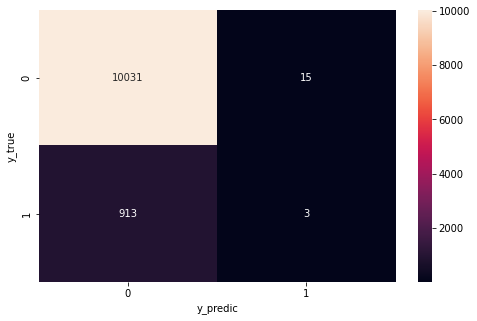

In [95]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction3), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_predic")
plt.ylabel("y_true")
plt.show()

##Kesimpulan :
Karena akurasi tidak optimal diterapkan dalam data yang tidak seimbang, akan menimbulkan kecenderungan terhadap data class mayoritas, maka kami memutuskan bahwa:

Dengan presisi 17%, dapat disimpulkan:

3 karyawan benar dipromosikan dari 18 karyawan yang diprediksi Machine Learning dipromosikan.

dan 

Dengan recall 0.0

#Recommendation

1.   Proyek ini dilaksanakan selama 2 minggu.
2.   Variabel utama yang digunakan dalam proyek ini adalah promosi, education, department, gender, dan recruitment channel.
3.   Menurut kami, model bisnis yang paling menguntungkan adalah Naive Bayes. Karena ketepatan menunjukkan kesalahan paling banyak dalam promosi yaitu sebanyak 913 karyawan. Dan juga hasil persentase tertinggi diantara model lainnya dengan recall 99%.
Sehingga rencana promosi dapat mencapai target yang optimal dan meningkatkan motivasi orang yang dipromosikan.

4. Proyek ini dapat dimanfaatkan oleh seorang HR dalam efisiensi waktu kinerja mereka untuk mengembangkan KPI dalam mempromosikan posisi.

5. Proyek ini dapat digunakan oleh seorang manajer dalam memprediksi kemungkinan kenaikan pangkat, sehingga manajer dapat mengetahui parameter yang tepat bagi seseorang untuk bisa mendapatkan promosi. Proyek ini juga dapat membantu manajer dalam meminimalkan kecacatan seseorang setelah mendapatkan promosi karena kesalahan dalam memilih kandidat promosi.